In [1]:
import pandas as pd, numpy as np, seaborn as sns

from pathlib import Path
%matplotlib inline
sns.set()

In [2]:
data_path = Path('/Users/mathewlong/Documents/Machine-Learning-Models-Data/Genomic-Data/Plasmid-DNA')

In [3]:
train_values = pd.read_csv(data_path/'train_values.csv', index_col='sequence_id')
train_lbls = pd.read_csv(data_path/'train_labels.csv', index_col='sequence_id')
test_values = pd.read_csv(data_path/'test_values.csv', index_col='sequence_id')

In [4]:
train_values.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_values.shape

(63017, 40)

In [6]:
train_values.dtypes

sequence                                 object
bacterial_resistance_ampicillin         float64
bacterial_resistance_chloramphenicol    float64
bacterial_resistance_kanamycin          float64
bacterial_resistance_other              float64
bacterial_resistance_spectinomycin      float64
copy_number_high_copy                   float64
copy_number_low_copy                    float64
copy_number_unknown                     float64
growth_strain_ccdb_survival             float64
growth_strain_dh10b                     float64
growth_strain_dh5alpha                  float64
growth_strain_neb_stable                float64
growth_strain_other                     float64
growth_strain_stbl3                     float64
growth_strain_top10                     float64
growth_strain_xl1_blue                  float64
growth_temp_30                          float64
growth_temp_37                          float64
growth_temp_other                       float64
selectable_markers_blasticidin          

In [7]:
# identify the length of the sequences
sequence_lengths = train_values['sequence'].apply(len) #.describe()
sequence_lengths.describe()

count    63017.000000
mean      4839.025501
std       3883.148431
min         20.000000
25%        909.000000
50%       4741.000000
75%       7490.000000
max      60099.000000
Name: sequence, dtype: float64

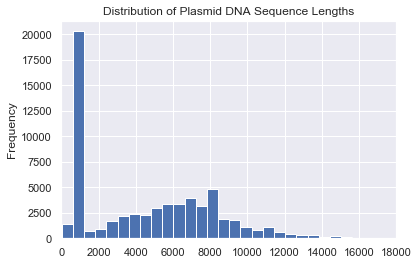

In [8]:
# Histogram plot for distribution
sequence_lengths.plot(kind='hist', title='Distribution of Plasmid DNA Sequence Lengths',
                     bins=100, xlim=(0,18000))

In [9]:
# exclude the dna_sequence column, 0th column, from the remaining features
train_values.iloc[:,1:].apply(pd.value_counts)

,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,growth_strain_dh10b,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
0.0,19590,60506,48706,62078,58592,18750,57313,50059,61841,61285,...,61417,61478,36890,57732,61978,62322,56381,61949,55170,61742
1.0,43427,2511,14311,939,4425,44267,5704,12958,1176,1732,...,1600,1539,26127,5285,1039,695,6636,1068,7847,1275


Text(0.5, 0, 'Proportion of sequences')

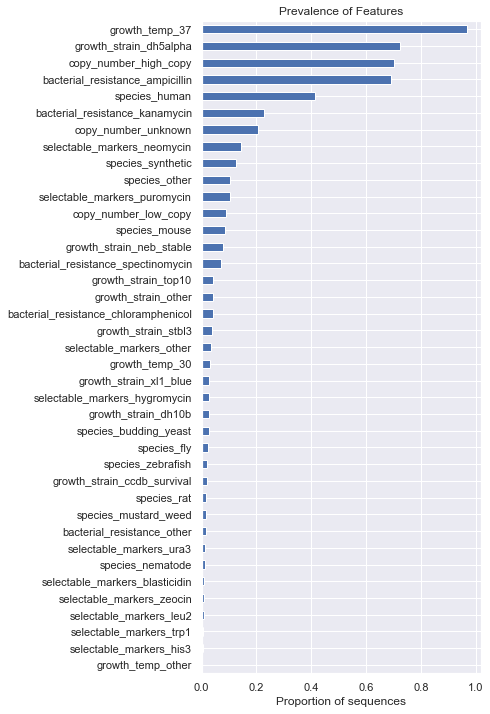

In [10]:
# sort the features and plot the prevalence (what proportion of sequences has that characteristic)
sorted_features = train_values.iloc[:,1:].mean().sort_values()

ax = sorted_features.plot(kind='barh', stacked=True, figsize=(5,12),
                         title='Prevalence of Features')
ax.set_xlabel('Proportion of sequences')

In [11]:
# train labels are one-hot encoded 
train_lbls.head()

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,...,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# collapse the lbls df into one column that shows lab ID for each sequence
# idxmax is similar function to argmax
lab_IDs = pd.DataFrame(train_lbls.idxmax(axis=1), columns=['lab_id'])
lab_IDs.head()

,lab_id
sequence_id,
9ZIMC,RYUA3GVO
5SAQC,RYUA3GVO
E7QRO,RYUA3GVO
CT5FP,RYUA3GVO
7PTD8,RYUA3GVO


In [13]:
# get distribution of lab prevalence in the training set
lab_IDs['lab_id'].value_counts().describe()

count    1314.000000
mean       47.958143
std       262.552258
min         1.000000
25%         9.000000
50%        15.000000
75%        34.000000
max      8286.000000
Name: lab_id, dtype: float64

In [14]:
# sort labs by prevalence
sorted_labs = lab_IDs['lab_id'].value_counts(normalize=True).sort_values(ascending=False)#.head()
sorted_labs.head()

I7FXTVDP    0.131488
RKJHZGDQ    0.043353
GTVTUGVY    0.042401
A18S09P2    0.016884
Q2K8NHZY    0.015440
Name: lab_id, dtype: float64

In [15]:
lab_IDs['lab_id'].value_counts(normalize=True).sort_values(ascending=False).head()

I7FXTVDP    0.131488
RKJHZGDQ    0.043353
GTVTUGVY    0.042401
A18S09P2    0.016884
Q2K8NHZY    0.015440
Name: lab_id, dtype: float64

In [16]:
# construct features from DNA sequences
bases = set(''.join(train_values['sequence'].values))
bases

{'A', 'C', 'G', 'N', 'T'}

In [ ]:
# bases2 = ''.join(train_values['sequence'].values)
# bases2

In [17]:
# convert into n-grams
from itertools import permutations

n = 4
kmers = [''.join(permutation) for permutation in permutations(bases, r=n)]

print(f'Number of kmers: {len(kmers)}')
kmers[-10:]

Number of kmers: 120


['GCNA',
 'GCNT',
 'GCTA',
 'GCTN',
 'GTAN',
 'GTAC',
 'GTNA',
 'GTNC',
 'GTCA',
 'GTCN']

In [18]:
# turn the strings into features
# use count method with non-overlapping substrings

def extract_ngram_features(data, kmers):
    ''' generate counts for each kmer'''
    
    features = pd.DataFrame(index=data.index)
    for kmer in kmers:
        features[kmer] = data['sequence'].str.count(kmer)

    return features

In [19]:
# calculate ngram features on the training set
ngram_features = extract_ngram_features(train_values, kmers)
ngram_features.head()

,ANCT,ANCG,ANTC,ANTG,ANGC,ANGT,ACNT,ACNG,ACTN,ACTG,...,GCNA,GCNT,GCTA,GCTN,GTAN,GTAC,GTNA,GTNC,GTCA,GTCN
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0,0,0,0,0,0,0,0,0,24,...,0,0,27,0,0,15,0,0,28,0
5SAQC,0,0,0,0,0,0,0,0,0,3,...,0,0,1,0,0,1,0,0,0,0
E7QRO,0,1,0,0,1,0,0,0,0,2,...,0,0,1,0,0,1,0,0,0,0
CT5FP,0,0,0,0,0,0,0,0,0,3,...,0,0,3,0,0,1,0,0,3,0
7PTD8,0,0,0,0,1,0,0,0,0,5,...,0,0,2,0,0,4,0,0,7,0


In [20]:
ngram_features.shape

(63017, 120)

In [21]:
# with new features for 120 possible kmers, the value shows the count of each kmer 
# within the DNA sequence
# Join all the features together

total_features = ngram_features.join(train_values.drop('sequence', axis=1))
total_features.head()

,ANCT,ANCG,ANTC,ANTG,ANGC,ANGT,ACNT,ACNG,ACTN,ACTG,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0,0,0,0,0,0,0,0,0,24,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,0,0,0,0,0,0,0,0,0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,0,1,0,0,1,0,0,0,0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,0,0,0,0,0,0,0,0,0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,0,0,0,0,1,0,0,0,0,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# goal is narrow down the fields of potential labs to a few choices < 10
def accuracy_scorer_top10(estimator, x, y):
    
    # predict probabilities across all possible levels
    probabilities = estimator.predict_proba(x)
    
    # get indices for top 10 predictions
    top10_idx = np.argpartition(probabilities, -10, axis=1)[:,-10:]
    
    # index in the classes list using top10 indices to gather class names
    top10_pred = estimator.classes_[top10_idx]
    
    # check if Y-true is in top 10 for each prediction set
    mask = top10_pred == y.reshape((y.size,1))
    
    # get the mean
    top10_accuracy = mask.any(axis=1).mean()
    
    return top10_accuracy

In [24]:
# build the model with random forest
from sklearn.ensemble import RandomForestClassifier

x = total_features

# create labeles
y = lab_IDs.values.ravel()

In [25]:
x.shape, y.shape

((63017, 159), (63017,))

In [26]:
# recall we have imbalanced dataset, use class_weight set to balanced

rf = RandomForestClassifier(n_jobs=4, n_estimators=150, class_weight='balanced',
                           max_depth=3, random_state=0)

# fit the model
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=4,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
rf.score(x,y)

0.18212545820968945

In [28]:
accuracy_scorer_top10(rf, x,y)

0.3770569846231969

In [30]:
# generate predictions for the test set
# create 4-gram features and join with binary features
test_ngram_features = extract_ngram_features(test_values,kmers)

total_test_features= test_ngram_features.join(test_values.drop('sequence', axis=1))

In [31]:
probs_TST = rf.predict_proba(total_test_features)

probs_TST[0]

array([0.00091458, 0.00108857, 0.00109213, ..., 0.00096252, 0.0002647 ,
       0.00017787])